In [21]:
# creating train validation test folder
# C:\Users\Rabbil\Documents\New_folder_weapons_dataset
# 'C:/Users/Rabbil/Documents/New_folder_weapons_dataset'

In [17]:
import os
import numpy as np
import shutil

# # Creating Train / Val / Test folders (One time use)
root_dir = 'C:/Users/shohidul/Desktop/wepon'
gunCls = '/handgun'
rifleCls = '/rifle'
otherCls = '/other'

os.makedirs(root_dir +'/train' + gunCls)
os.makedirs(root_dir +'/train' + rifleCls)
os.makedirs(root_dir +'/train' + otherCls)
os.makedirs(root_dir +'/val' + gunCls)
os.makedirs(root_dir +'/val' + rifleCls)
os.makedirs(root_dir +'/val' + otherCls)
os.makedirs(root_dir +'/test' + gunCls)
os.makedirs(root_dir +'/test' + rifleCls)
os.makedirs(root_dir +'/test' + otherCls)


# Creating partitions of the data after shuffeling
currentCls = gunCls
src = 'C:/Users/shohidul/Desktop/wepon'+currentCls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])

train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))


# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/train" + currentCls)

for name in val_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/val"+currentCls)

for name in test_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/test"+currentCls)


Total images:  9104
Training:  6372
Validation:  1366
Testing:  1366


In [18]:
# Creating partitions of the data after shuffeling
currentCls = rifleCls
src = 'C:/Users/shohidul/Desktop/wepon'+currentCls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])

train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))


# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/train"+currentCls)

for name in val_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/val"+currentCls)

for name in test_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/test"+currentCls)

Total images:  14245
Training:  9971
Validation:  2137
Testing:  2137


In [19]:
# Creating partitions of the data after shuffeling
currentCls = otherCls
src = "C:/Users/shohidul/Desktop/wepon"+currentCls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])

train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))


# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/train"+currentCls)

for name in val_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/val"+currentCls)

for name in test_FileNames:
    shutil.copy(name, "C:/Users/shohidul/Desktop/wepon/test"+currentCls)

Total images:  3194
Training:  2235
Validation:  479
Testing:  480


In [32]:
#Augmentation process for data analysis

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
PATH="C:/Users/shohidul/Desktop/wepon"
train_dir = os.path.join(PATH, 'train')

In [11]:
#train_dir = os.path.join(PATH, 'train')

In [12]:
validation_dir = os.path.join(PATH, 'val')

In [13]:
batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [15]:
###1.Rotation

In [16]:
image_generator = ImageDataGenerator(rescale=1./255,rotation_range=135)

Found 18578 images belonging to 3 classes.


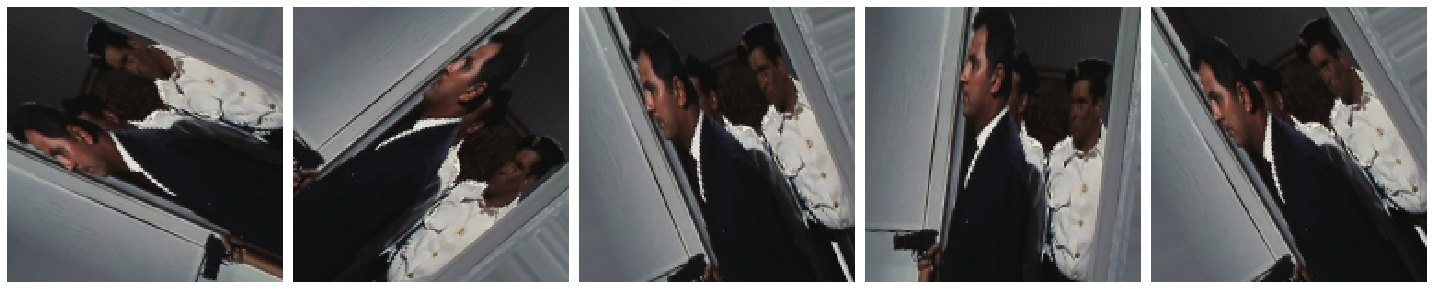

In [17]:
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
##2.Width Shifting

Found 18578 images belonging to 3 classes.


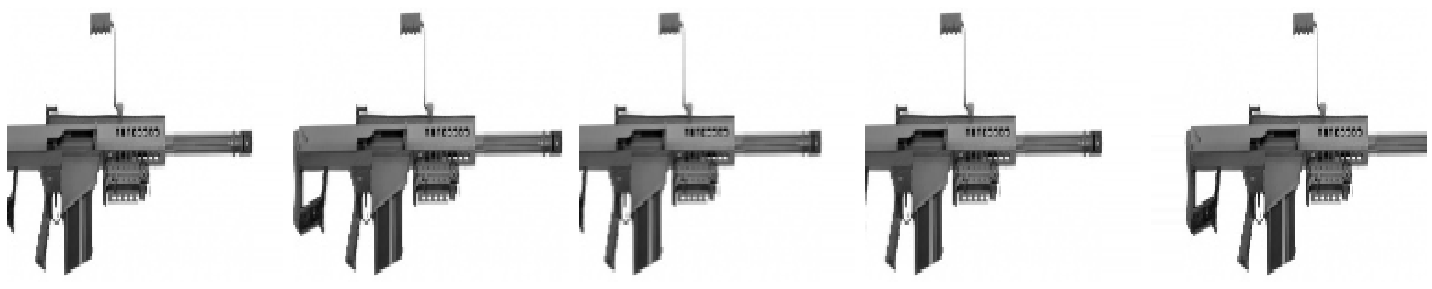

In [18]:
image_generator = ImageDataGenerator(rescale=1./255,width_shift_range=.15)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
###3.Height Shifting

Found 18578 images belonging to 3 classes.


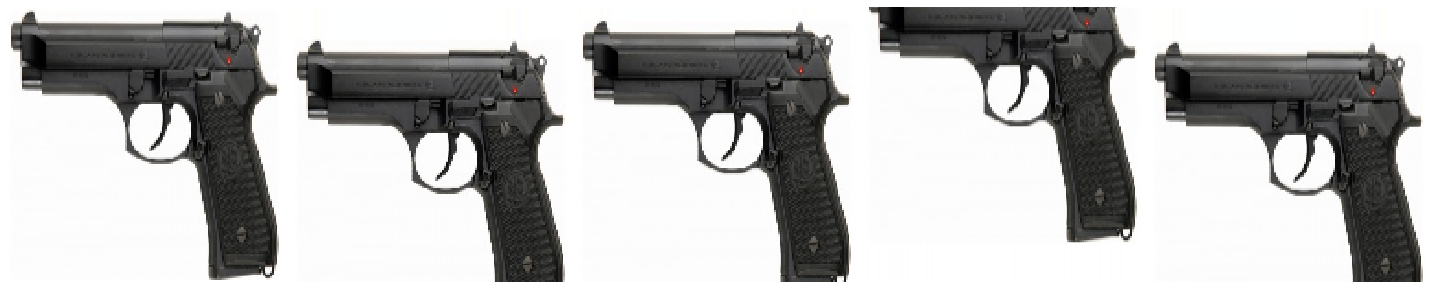

In [20]:
image_generator = ImageDataGenerator(rescale=1./255,height_shift_range=.15)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
###4. Brightness

Found 7972 images belonging to 3 classes.


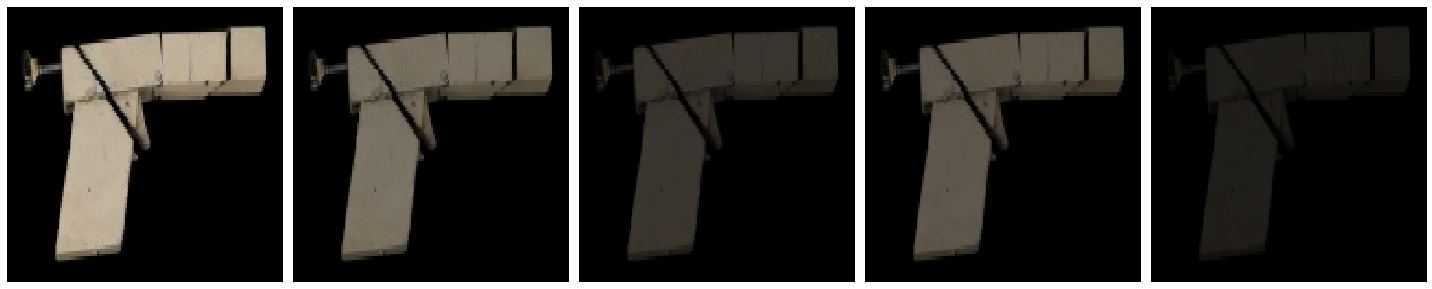

In [15]:
image_generator = ImageDataGenerator(rescale=1./255,brightness_range=(0.1,0.9))
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
##5. Shear Intensity

Found 7972 images belonging to 3 classes.


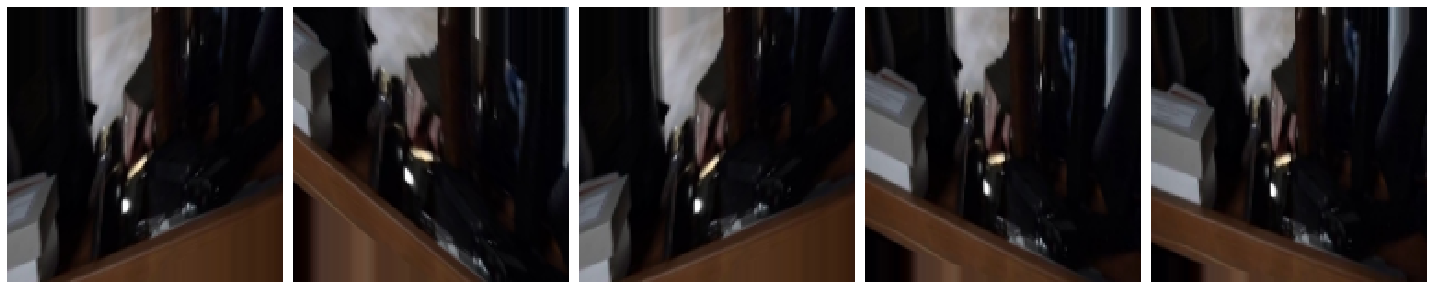

In [17]:
image_generator = ImageDataGenerator(rescale=1./255,shear_range=45.0)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [18]:
###6. Zoom

Found 7972 images belonging to 3 classes.


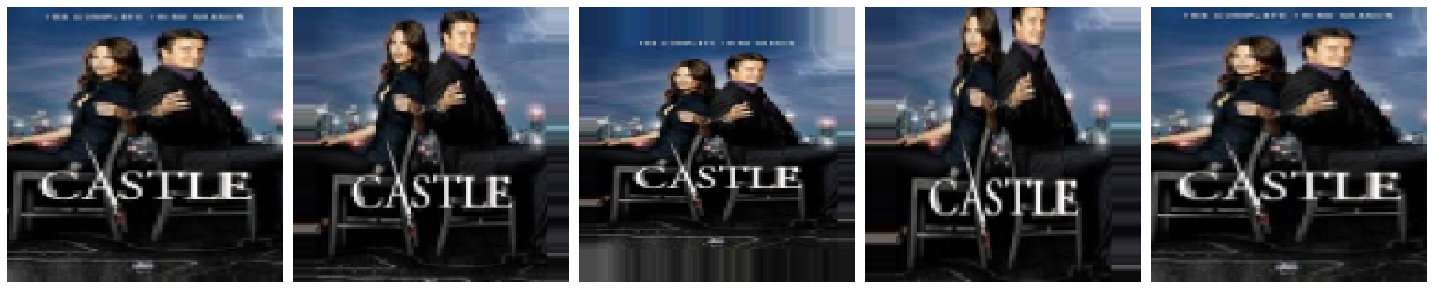

In [19]:
image_generator = ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [20]:
#7. Channel Shift

Found 7972 images belonging to 3 classes.


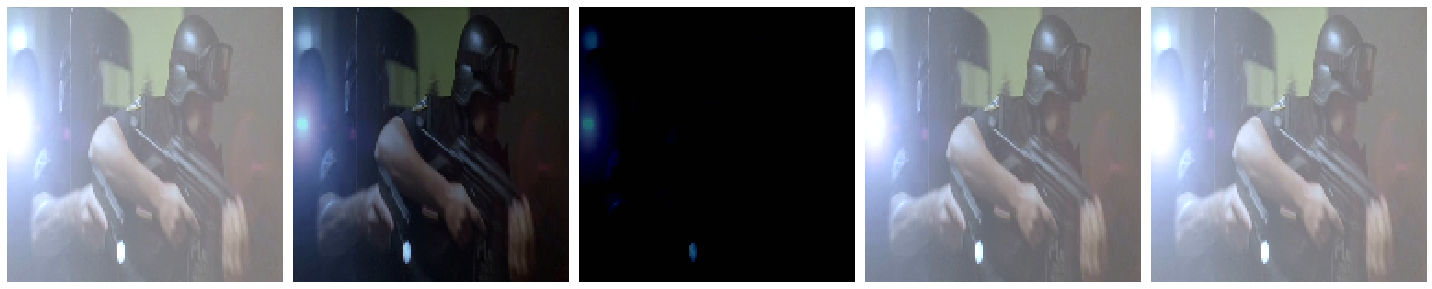

In [21]:
image_generator = ImageDataGenerator(rescale=1./255,channel_shift_range=150)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
##8. Horizontal Flip

Found 7972 images belonging to 3 classes.


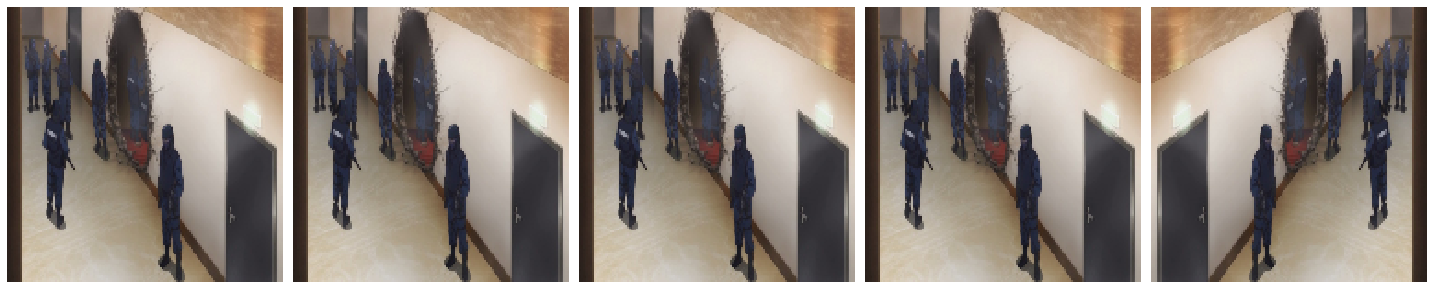

In [12]:
image_generator = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
##9. Horizontal Flip

Found 7972 images belonging to 3 classes.


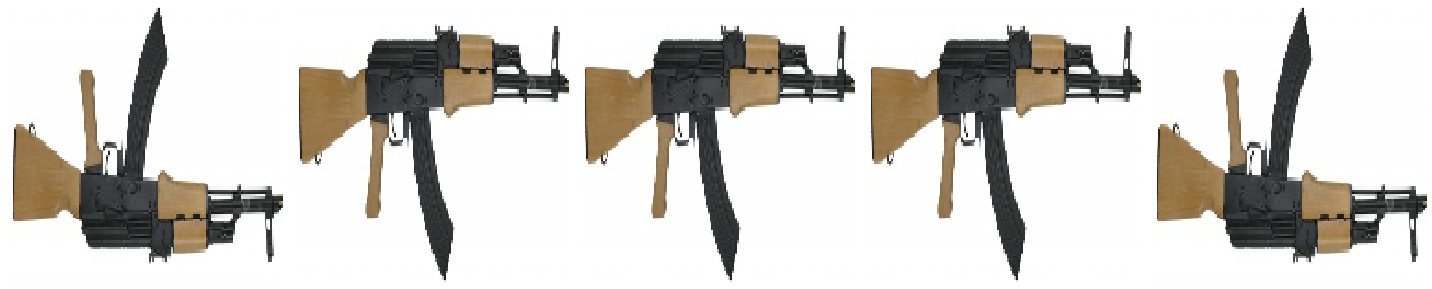

In [24]:
image_generator = ImageDataGenerator(rescale=1./255,vertical_flip=True)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 7972 images belonging to 3 classes.


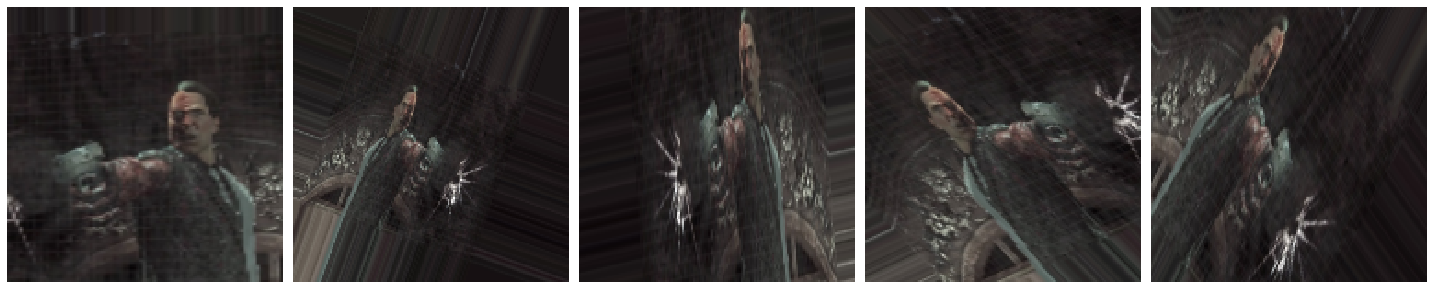

In [25]:
image_generator = ImageDataGenerator(rescale=1./255,
rotation_range=45,
width_shift_range=.15,
height_shift_range=.15,
horizontal_flip=True,
zoom_range=0.5)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [26]:
###############1.Nearest

Found 7972 images belonging to 3 classes.


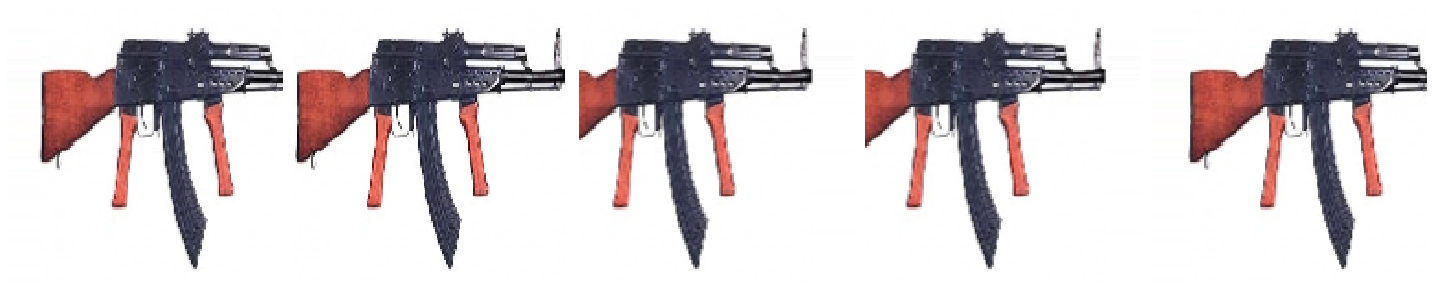

In [27]:
image_generator = ImageDataGenerator(rescale=1./255,width_shift_range=.15,fill_mode='nearest')
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
###2. Reflect

Found 7972 images belonging to 3 classes.


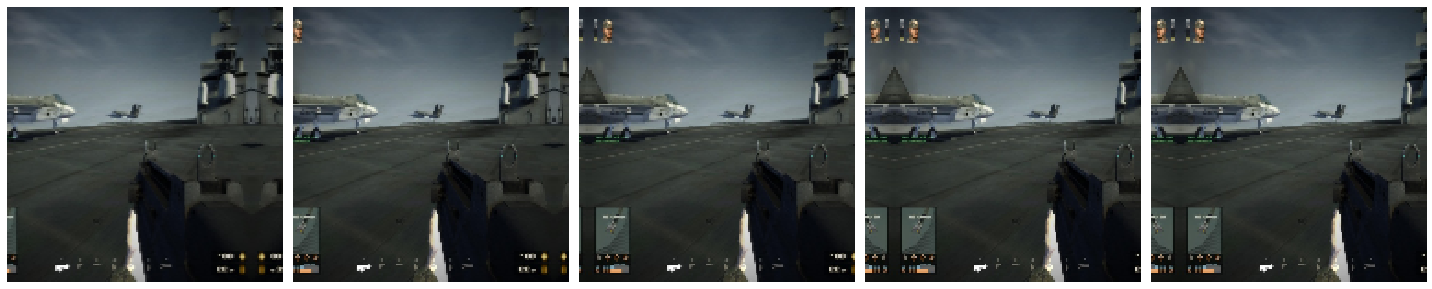

In [28]:
image_generator = ImageDataGenerator(rescale=1./255,width_shift_range=.15,fill_mode='reflect')
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
####3. Constant

Found 7972 images belonging to 3 classes.


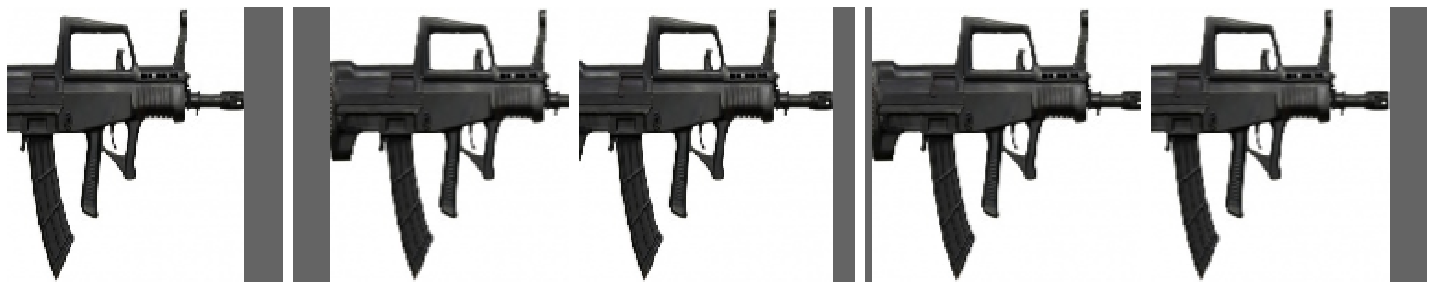

In [29]:
image_generator = ImageDataGenerator(rescale=1./255,width_shift_range=.15,  fill_mode='constant',cval=100)
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [30]:
####4. Wrap

Found 7972 images belonging to 3 classes.


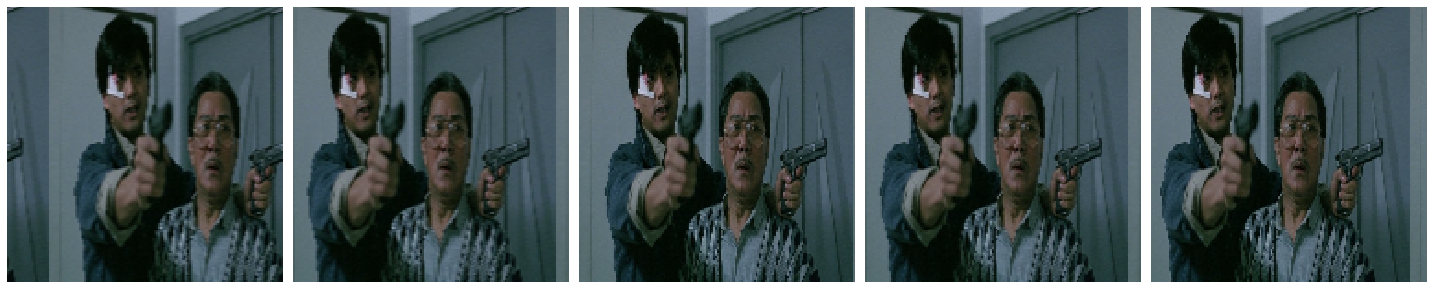

In [31]:
image_generator = ImageDataGenerator(rescale=1./255,width_shift_range=.15,  fill_mode='wrap')
train_data_gen = image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH)
)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [22]:
PATH="C:/Users/shohidul/Desktop/wepon"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')

In [23]:
#batch_size = 128
batch_size = 30
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [24]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [25]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 18578 images belonging to 3 classes.


In [26]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 3982 images belonging to 3 classes.


In [27]:
sample_training_images, _ = next(train_data_gen)

In [30]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

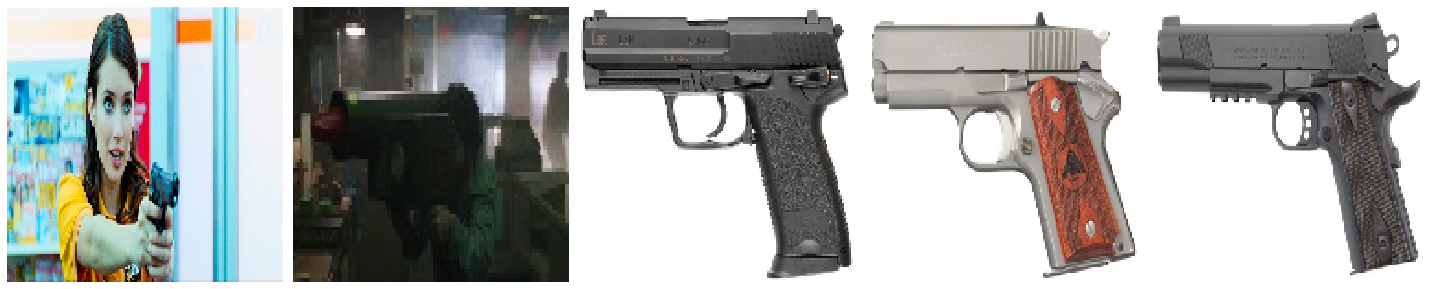

In [31]:
plotImages(sample_training_images[:5])

In [33]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [36]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 30 steps
Epoch 1/5
30/30 [==============================] - 414s 14s/step - loss: -2145.2094 - accuracy: 0.1256 - val_loss: -13959.4166 - val_accuracy: 0.1322
Epoch 2/5
30/30 [==============================] - 420s 14s/step - loss: -289907.9528 - accuracy: 0.1144 - val_loss: -952394.0177 - val_accuracy: 0.1322
Epoch 3/5
30/30 [==============================] - 351s 12s/step - loss: -2901947.1849 - accuracy: 0.1244 - val_loss: -10034707.0917 - val_accuracy: 0.1322
Epoch 4/5
30/30 [==============================] - 293s 10s/step - loss: -27762424.1750 - accuracy: 0.1233 - val_loss: -67294769.7667 - val_accuracy: 0.1322
Epoch 5/5
30/30 [==============================] - 283s 9s/step - loss: -119003656.7958 - accuracy: 0.1144 - val_loss: -259973513.0667 - val_accuracy: 0.1322


In [37]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [38]:
history_dict = history.history
print(history_dict.keys())
acc = history_dict['acc']
val_acc = history_dict['val_acc']

In [40]:
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

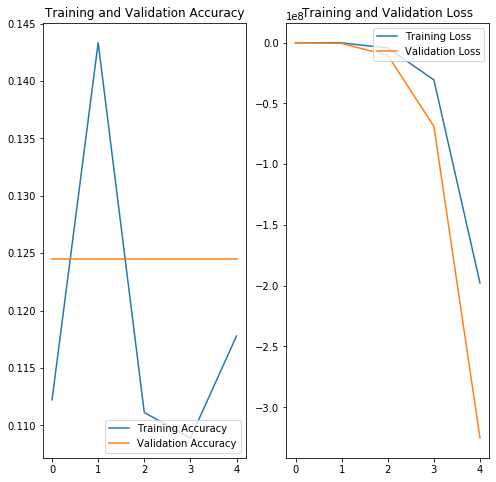

In [39]:


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 18578 images belonging to 3 classes.


In [42]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 3982 images belonging to 3 classes.


In [ ]:
#Creating a new network with Dropouts
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [44]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)       

In [45]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=batch_size
)



Epoch 1/5
30/30 [==============================] - 185s 6s/step - loss: -844.4672 - acc: 0.1300 - val_loss: -6778.3253 - val_acc: 0.1056
Epoch 2/5
30/30 [==============================] - 342s 11s/step - loss: -118702.2784 - acc: 0.1311 - val_loss: -497955.7015 - val_acc: 0.1056
Epoch 3/5
30/30 [==============================] - 306s 10s/step - loss: -4662467.7125 - acc: 0.1200 - val_loss: -9266475.8938 - val_acc: 0.1056
Epoch 4/5
30/30 [==============================] - 148s 5s/step - loss: -32083949.5500 - acc: 0.1367 - val_loss: -66420644.7750 - val_acc: 0.1056
Epoch 5/5
30/30 [==============================] - 119s 4s/step - loss: -151775011.4833 - acc: 0.1267 - val_loss: -297095145.0000 - val_acc: 0.1056


KeyError: 'accuracy'

In [56]:
history_dict = history.history
print(history_dict.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [57]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

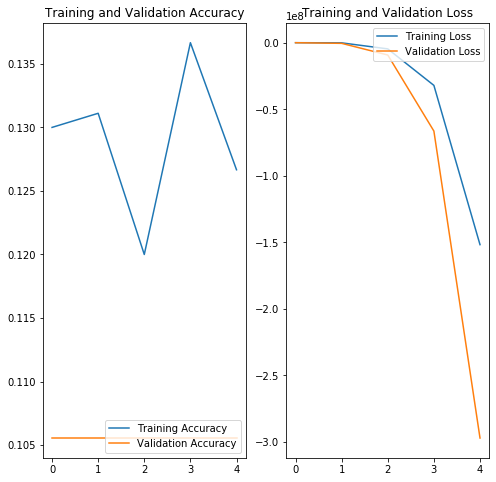

In [59]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
